In [82]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt 
import numpy as np

with MPRester("anJWfQsT0ZKuEBip") as m:
    # Structure for material id
    struct = m.get_structure_by_material_id("mp-961661")
    band = m.get_bandstructure_by_material_id("mp-961661")
    

# Bande interdite

Energie : 0.3250000000000002 ev 
Bande directe : non 
Transition : Γ-X


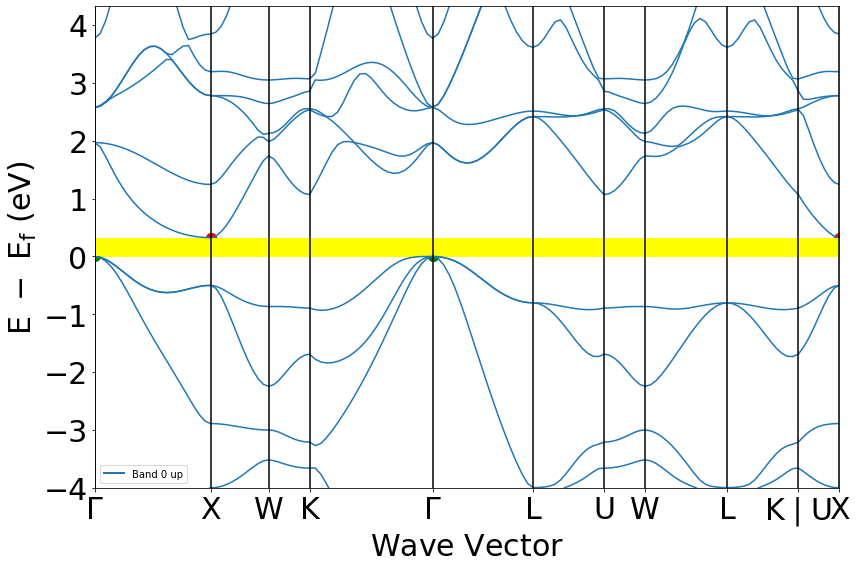

In [83]:
bandgap = band.get_band_gap()
energy = bandgap['energy']
direct = bandgap['direct']
transition = bandgap['transition']

print("Energie : {} ev \nBande directe : {} \nTransition : \u0393-X".format(energy, 'oui' if direct else 'non'))

bsplotter = BSPlotter(band)
bsplotter.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(0, bsplotter.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, bandgap.get("energy"), color ="yellow")
plt.show()

On constate que la bande interdite est indirecte et a une énergie inférieure à 1ev. Il s'agit d'un semi-conducteur. La bande interdite est indirecte, cela signifie qu'un électron ne peut pas passer du plus haut état d'énergie dans la bande de valence au plus bas état d'énergie dans la bande de conduction sans un changement de moment.

# Dernière bande de valence et première bande de conduction


1. Bande de valence 


La direction dans laquelle la dernière bande de valence possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

Bandes de valence contenant les énergies les plus hautes :  [10, 11, 12]


La dispersion maximale de la bande de valence entre X-W est de : -3.3971745400552966
Elle est représentée par la flèche bleue sur la figure ci-dessous.

La dispersion minimale de la bande de valence entre Γ-X est de : -0.4867564322359382
Elle est représentée par la flèche rouge sur la figure ci-dessous.



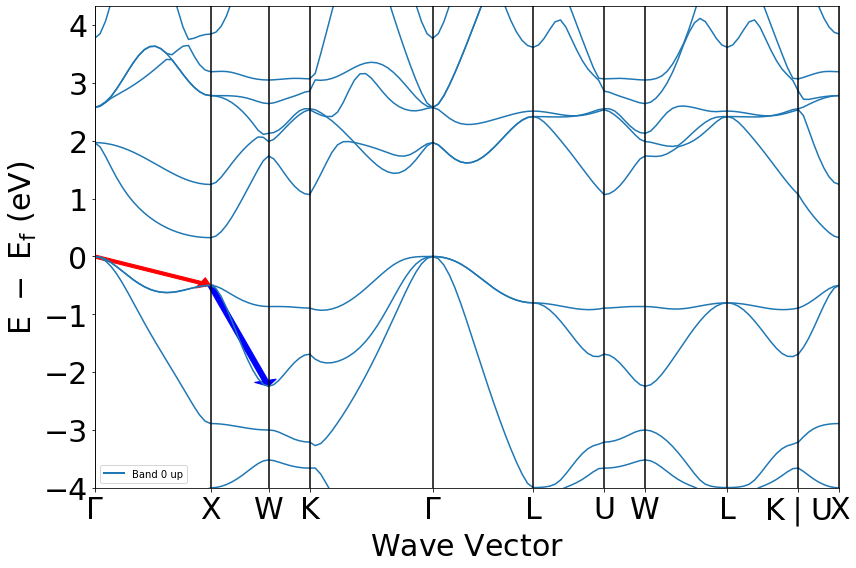

In [87]:
data = bsplotter.bs_plot_data()
distance = data.get("ticks").get("distance")
energie = data.get("energy")


# Dernière bande de valence
valence = list(band.get_vbm()["band_index"].values())[0]
print("Bandes de valence contenant les énergies les plus hautes : ", valence)
print ("\n")

# Différence en x
dK = []
iDistance = []
for i in range (len(distance)-1):
    if distance[i] != distance[i+1]:
        dK.append(distance[i+1] - distance[i])
        iDistance.append(i)

# Différence en y
dE_v = []
dE_c = []
for i in range (len(energie.get("1"))):
    dE_v.append(energie.get("1")[i][11][-1] - energie.get("1")[i][11][0])
    dE_c.append(energie.get("1")[i][12][-1] - energie.get("1")[i][12][0])

# Pentes
dispersion_v = []
dispersion_v_abs = []
dispersion_c = []
dispersion_c_abs = []
for i in range(len(dK)):
    dispersion_v.append(dE_v[i]/dK[i])
    dispersion_v_abs.append(abs(dispersion_v[i]))
    dispersion_c.append(dE_c[i]/dK[i])
    dispersion_c_abs.append(abs(dispersion_c[i]))

# Pente maximum de la bande de valence
indexMax_v = dispersion_v_abs.index(np.max(dispersion_v_abs))
max_v = dispersion_v[indexMax_v]
print("La dispersion maximale de la bande de valence entre X-W est de :", max_v)
print("Elle est représentée par la flèche bleue sur la figure ci-dessous.\n")

#Pente minimum de la bande de valence
indexMin_v = dispersion_v_abs.index(np.min(dispersion_v_abs))
min_v = dispersion_v[indexMin_v]
print("La dispersion minimale de la bande de valence entre Γ-X est de :", min_v)
print("Elle est représentée par la flèche rouge sur la figure ci-dessous.\n")

bsplotter.get_plot(zero_to_efermi = True, ylim = None, smooth = False, vbm_cbm_marker = False, smooth_tol = None)
plt.arrow(distance[iDistance[indexMax_v]], energie.get('1')[indexMax_v][11][0],dK[indexMax_v],dE_v[indexMax_v], color = "blue", width = 0.05, head_width = 0.2, head_length = 0.1, length_includes_head = True)
plt.arrow(distance[iDistance[indexMin_v]], energie.get('1')[indexMin_v][11][0],dK[indexMin_v],dE_v[indexMin_v], color = "red", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)
plt.show()




2. Bande de conduction 


De même que pour la bande de valence, la direction dans laquelle la première bande de conduction possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

Bande de conduction contenant l'énergie la plus basse :  [13] 

La dispersion maximale de la bande de conduction entre K|U-X est de : 1.081696826788801
Elle est représentée par la flèche verte sur la figure ci-dessous.

La dispersion minimale de la bande de conduction entre W-K est de : -0.07403980824585024
Elle est représentée par la flèche orange sur la figure ci-dessous.



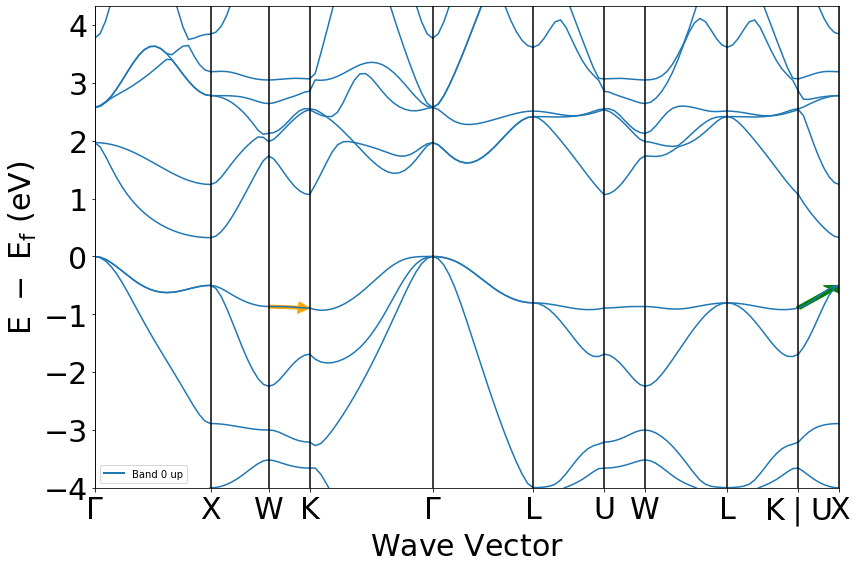

In [88]:
# Premiere bande de conduction
conduction = list(band.get_cbm()["band_index"].values())[0]
print("Bande de conduction contenant l'énergie la plus basse : ", conduction, "\n")

#Pente maximum de la bande de conduction
indexMax_c = dispersion_c_abs.index(np.max(dispersion_c_abs))
max_c = dispersion_c[indexMax_c]
print("La dispersion maximale de la bande de conduction entre K|U-X est de :", max_c)
print("Elle est représentée par la flèche verte sur la figure ci-dessous.\n")

#Pente minimum de la bande de conduction
indexMin_c = dispersion_c_abs.index(np.min(dispersion_c_abs))
min_c = dispersion_c[indexMin_c]
print("La dispersion minimale de la bande de conduction entre W-K est de :", min_c)
print("Elle est représentée par la flèche orange sur la figure ci-dessous.\n")

bsplotter.get_plot(zero_to_efermi = True, ylim = None, smooth = False, vbm_cbm_marker = False, smooth_tol = None)
plt.arrow(distance[iDistance[indexMax_c]], energie.get('1')[indexMax_c][12][0],dK[indexMax_c],dE_c[indexMax_c], color = "green", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)
plt.arrow(distance[iDistance[indexMin_c]], energie.get('1')[indexMin_c][12][0],dK[indexMin_c],dE_c[indexMin_c], color = "orange", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)

plt.show()

# Masse effective 

Masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique.

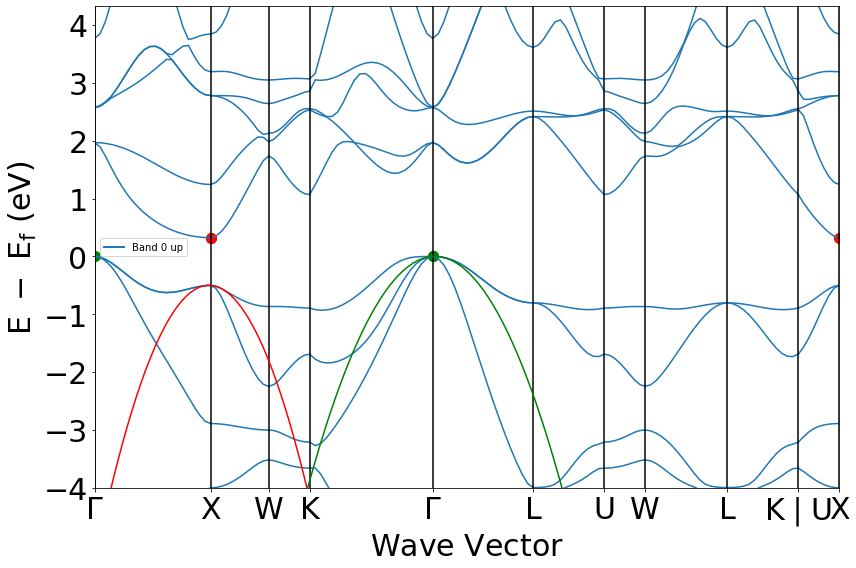

Masse effective au sommet de la dernière bande de valence :  -1.0991393272488718e-30 kg
Masse effective à la base de la première bande de conduction :  -7.448766778197023e-31 kg


In [86]:
# Bande de valence
x_valence = [data.get('distances')[3][-2], data.get('distances')[4][0], data.get('distances')[4][2]]
y_valence = [energie.get('1')[3][11][-2], energie.get('1')[4][11][0], energie.get('1')[4][11][2]]

# Calcul de a,b et c
abc_v = np.polyfit(x_valence, y_valence, 2)

# Equation parabolique
def f_v(k):
    return abc_v[0]*k*k + abc_v[1]*k + abc_v[2]

x_plot_v = np.arange(0, 6, 0.01)
y_plot_v = f_v(x_plot_v)


# Bande de conduction
x_conduction = [data.get('distances')[0][-2], data.get('distances')[1][0], data.get('distances')[1][2]]
y_conduction = [energie.get('1')[0][12][-2], energie.get('1')[1][12][0], energie.get('1')[1][12][2]]

# Calcul des constantes a,b et c
abc_c = np.polyfit(x_conduction, y_conduction, 2)

# Equation parabolique
def f_c(k):
    return abc_c[0]*k*k + abc_c[1]*k + abc_c[2]

x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)


bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')
plt.show()


A = 10**(-10)
eV = 1.602176563*10**(-19)
hBarre = 1.054571818*10**(-34)

# Masse effective au sommet de la dernière bande de valence
me_v = (hBarre**2)/(2*abc_v[0]*(A**2)*eV)
print("Masse effective au sommet de la dernière bande de valence : ", me_v, "kg")

# Masse effective à la base de la première bande de conduction
me_c = (hBarre**2)/(2*abc_c[0]*(A**2)*eV)
print("Masse effective à la base de la première bande de conduction : ", me_c, "kg")